Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


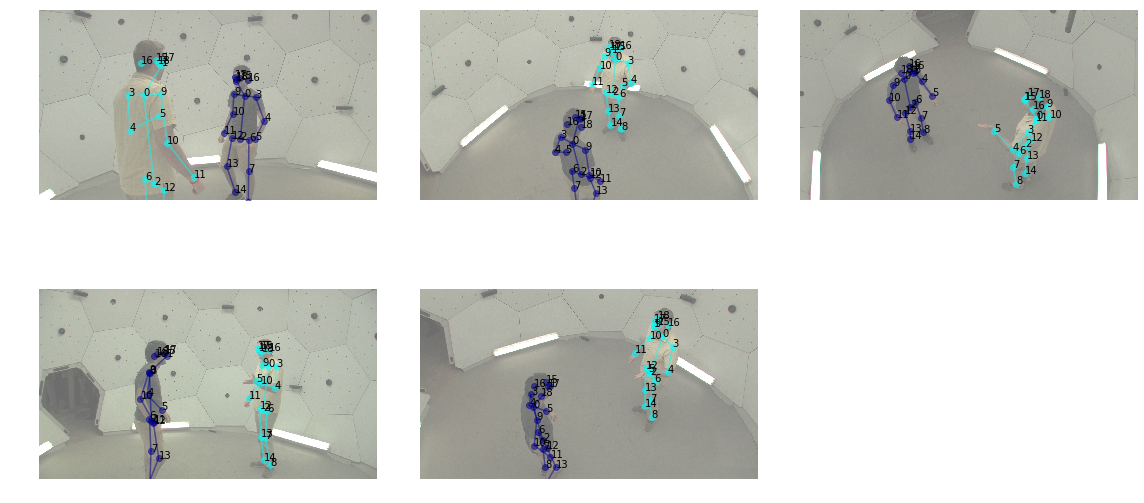

In [1]:
%matplotlib inline

import json
Settings = json.load(open('../settings.txt'))
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
from cselect import color as cs
import sys
sys.path.insert(0,'../')
sys.path.insert(0,'../samples')
sys.path.insert(0,'../debugging')
from mvpose.data import epfl_campus
from time import time

root = Settings['CMU']['data_root']
tmp = Settings['tmp']

import mvpose.data.kth_football2 as kth
from mvpose import pose
from mvpose.settings import get_settings
from paf_loader import Loader
from mvpose.evaluation import pcp

import mvpose.data.kth_football2 as kth
from mvpose import pose
from mvpose.settings import get_settings
from paf_loader import Loader
from mvpose.evaluation import pcp
from mvpose.plot.limbs import draw_mscoco_human, draw_mscoco_human2d
from mvpose.data import cmu_panoptic
from cselect import color as cs
from random import shuffle


from openpose import OpenPose

pe = OpenPose(tmp=tmp)


FRAME = 400

nodes = [0, 1, 2, 3, 4]
panels = [0, 0, 0, 0, 0]
# seq_name = '160224_haggling1'
seq_name = '160422_ultimatum1'
# seq_name = '160906_pizza1'

valid_frames = list(range(300, 3166))

Im, Y, Calib = cmu_panoptic.get(root, seq_name, 
                                panels, nodes, frame=FRAME)

fig = plt.figure(figsize=(16,8))

# Edges between joints in the body skeleton
body_edges = np.array([[1,2],[1,4],[4,5],[5,6],[1,3],[3,7],[7,8],[8,9],[3,13],[13,14],[14,15],[1,10],[10,11],[11,12]])-1


colors = ['red', 'blue', 'yellow', 'cyan', 'orange', 
          'teal', 'white', 'cornflowerblue', 'limegreen',
         'rosybrown', 'sienna', 'plum', 'slategrey',
         'orchid', 'lightblue', 'azure', 'aliceblue',
         'darkblue', 'lightcoral', 'silver', 'mediumpurple',
         'lightskyblue']
shuffle(colors)

# n = 18
# colors = cs.rangecolor(n, (255, 0, 0), (0, 256, 0))/255

for idx, cam in enumerate(Calib):
    ax = fig.add_subplot(2,3,1+idx)
    ax.axis('off')
    im = Im[idx]
    h,w,_ = im.shape
    ax.imshow(im, alpha=0.6)
    ax.set_xlim([0, 1920])
    ax.set_ylim([1080, 0])
#     ax.set_xlim([1200, 1800])
#     ax.set_ylim([1080, 300])
    
    for pid, points3d_weighted in Y:
        pts3d = points3d_weighted[:, 0:3].astype('float32')
        pts2d = cam.projectPoints(pts3d)
        pts2dT = pts2d.transpose()
        ax.scatter(pts2d[:, 0], pts2d[:, 1], color=colors[pid], alpha=0.5)
        for edge in body_edges:
            ax.plot(pts2dT[0, edge], pts2dT[1, edge],
                    color=colors[pid], alpha=0.5)
        for idx, (x, y) in enumerate(pts2d):
            if x >= 0 and x < w:
                if y >= 0 and y < h:
                    ax.text(x, y, str(idx))
        
    
plt.tight_layout()

plt.show()

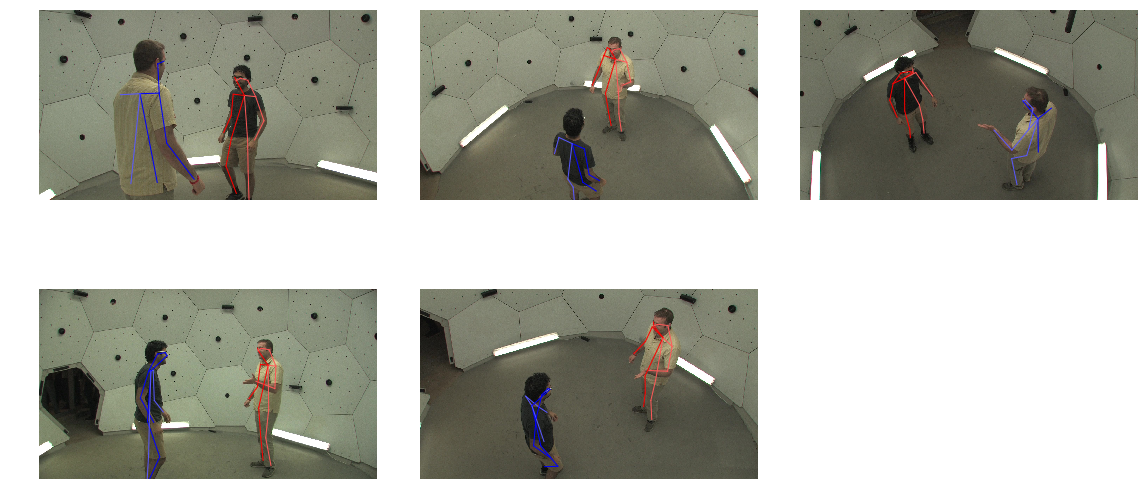

In [2]:
predictions = pe.predict(Im, 'cvpr_cmu' + seq_name, FRAME)

colors = ['red', 'blue', 'green', 'yellow', 'teal', 'magenta']

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fig = plt.figure(figsize=(16, 8))
for idx, (im, pred) in enumerate(zip(Im, predictions)):
    ax = fig.add_subplot(2, 3, idx+1); ax.axis('off')
    ax.imshow(im)
    ax.set_xlim([0, 1920])
    ax.set_ylim([1080, 0])
    
    for pid, human in enumerate(pred):
        draw_mscoco_human2d(ax, human[:, 0:2], color=colors[pid])

    
plt.tight_layout()
plt.show()

In [ ]:
# valid_frames = list(range(300, 3166))
# for frame in valid_frames:
#     if frame % 10 == 0:
#         print('frame', frame)
#     Im, Y, calib = cmu_panoptic.get(root, seq_name, 
#                                     panels, nodes, frame=frame,
#                                     ignore_videos=True)
#     predictions = pe.predict(Im, 'cvpr_cmu' + seq_name, frame)

In [9]:
valid_frames = list(range(300, 3166))
# valid_frames = list(range(300, 400))


Calib = []
poses_per_frame = []
poses_per_frame_lookup = {}
Pos3d = {}

_start = time()
for frame in valid_frames:
    if frame % 10 == 0:
        print('frame', frame)
    Im, Y, calib = cmu_panoptic.get(root, seq_name, 
                                    panels, nodes, frame=frame,
                                    ignore_videos=True)
#     Calib.append(calib)
    Pos3d[frame] = Y
    predictions = pe.predict(Im, 'cvpr_cmu' + seq_name, frame)
    poses_per_frame.append(predictions)
    poses_per_frame_lookup[frame] = predictions
_end = time()
Calib = calib
print('elapsed', _end - _start)

frame 300
frame 310
frame 320
frame 330
frame 340
frame 350
frame 360
frame 370
frame 380
frame 390
frame 400
frame 410
frame 420
frame 430
frame 440
frame 450
frame 460
frame 470
frame 480
frame 490
frame 500
frame 510
frame 520
frame 530
frame 540
frame 550
frame 560
frame 570
frame 580
frame 590
frame 600
frame 610
frame 620
frame 630
frame 640
frame 650
frame 660
frame 670
frame 680
frame 690
frame 700
frame 710
frame 720
frame 730
frame 740
frame 750
frame 760
frame 770
frame 780
frame 790
frame 800
frame 810
frame 820
frame 830
frame 840
frame 850
frame 860
frame 870
frame 880
frame 890
frame 900
frame 910
frame 920
frame 930
frame 940
frame 950
frame 960
frame 970
frame 980
frame 990
frame 1000
frame 1010
frame 1020
frame 1030
frame 1040
frame 1050
frame 1060
frame 1070
frame 1080
frame 1090
frame 1100
frame 1110
frame 1120
frame 1130
frame 1140
frame 1150
frame 1160
frame 1170
frame 1180
frame 1190
frame 1200
frame 1210
frame 1220
frame 1230
frame 1240
frame 1250
frame 1260
fra

In [10]:
from mvpose.baseline.tracking import tracking, Track

_start = time()
tracks = tracking(Calib, poses_per_frame,
                  epi_threshold=40,
                  scale_to_mm=10,
                  max_distance_between_tracks=200,
                  actual_frames=valid_frames,
                  min_track_length=4,
                  merge_distance=150,
                  z_axis=1,
                  last_seen_delay=5)
_end = time()
print('elapsed', _end - _start)
print("#tracks", len(tracks))
print('')
for track in tracks:
    print('\ttrack length:', len(track))

elapsed 57.327455043792725
#tracks 60

	track length: 153
	track length: 788
	track length: 72
	track length: 607
	track length: 4
	track length: 41
	track length: 99
	track length: 5
	track length: 119
	track length: 4
	track length: 23
	track length: 175
	track length: 357
	track length: 8
	track length: 1393
	track length: 7
	track length: 16
	track length: 6
	track length: 126
	track length: 20
	track length: 73
	track length: 55
	track length: 38
	track length: 122
	track length: 102
	track length: 9
	track length: 6
	track length: 55
	track length: 16
	track length: 5
	track length: 12
	track length: 13
	track length: 12
	track length: 30
	track length: 240
	track length: 153
	track length: 85
	track length: 20
	track length: 45
	track length: 34
	track length: 25
	track length: 569
	track length: 8
	track length: 10
	track length: 17
	track length: 31
	track length: 178
	track length: 9
	track length: 6
	track length: 11
	track length: 41
	track length: 32
	track length: 48
	tra

In [11]:
is_smoothing = True
if is_smoothing:
    _start = time()
    tracks_ = []
    for track in tracks:
        track = Track.smoothing(track, 
                                sigma=1.7,
                                interpolation_range=20)
        tracks_.append(track)
    tracks = tracks_
    _end = time()
    print("elapsed", _end - _start)

elapsed 0.6497302055358887


In [12]:
def calculate_pcp_score(Y, detections):
    alpha = 0.5
    Humans = kth.transform3d_from_mscoco(detections)
    L_Arms = []
    U_Arms = []
    L_Legs = []
    U_Legs = []
    GTIDs = []
    
    Y_kth = []
    for _, gt in Y:
        Y_kth.append(gt[:, 0:3])
    Y_kth = kth.transform3d_from_mscoco(Y_kth)
        
    for gtid, gt in enumerate(Y_kth):
        if gt is None:
            continue
        
        larms = 0
        uarms = 0
        llegs = 0
        ulegs = 0
        avg = 0
        for d in Humans:
            r = pcp.evaluate(gt, d, alpha)
            larms_ = r.lower_arms
            uarms_ = r.upper_arms
            ulegs_ = r.upper_legs
            llegs_ = r.lower_legs
            avg_ = (larms_ + uarms_ + ulegs_ + llegs_) / 4
            if avg_ > avg:
                avg = avg_
                larms = larms_
                uarms = uarms_
                llegs = llegs_
                ulegs = ulegs_
        
        L_Arms.append(larms)
        U_Arms.append(uarms)
        L_Legs.append(llegs)
        U_Legs.append(ulegs)
        GTIDs.append(gtid)
    
    return L_Arms, U_Arms, L_Legs, U_Legs, GTIDs

In [13]:
PER_GTID = {}
for idx, frame in enumerate(valid_frames):
    Humans = []
    for track in tracks:
        pose = track.get_by_frame(frame)
        if pose is not None:
            Humans.append(pose)
    
    Y = Pos3d[frame]
    Y = cmu_panoptic.transform_y(Y)
    L_Arms, U_Arms, L_Legs, U_Legs, GTIDs = calculate_pcp_score(Y, Humans)
    if len(L_Arms) > 0:
        for gtid, larms, uarms, llegs, ulegs in zip(
            GTIDs, L_Arms, U_Arms, L_Legs, U_Legs
        ):
            if not gtid in PER_GTID:
                PER_GTID[gtid] = {
                    'larms': [],
                    'uarms': [],
                    'llegs': [],
                    'ulegs': [],
                    'frame': []
                }
            PER_GTID[gtid]['larms'].append(larms)
            PER_GTID[gtid]['uarms'].append(uarms)
            PER_GTID[gtid]['llegs'].append(llegs)
            PER_GTID[gtid]['ulegs'].append(ulegs)
            PER_GTID[gtid]['frame'].append(frame)

In [14]:
total_avg = []
for key, values in PER_GTID.items():
    print('actor ', key)
    print('\tuarms:', np.mean(values['uarms']))
    print('\tlarms:', np.mean(values['larms']))
    print('\tulegs:', np.mean(values['ulegs']))
    print('\tllegs:', np.mean(values['llegs']))
    avg = np.mean([
        np.mean(values['uarms']),
        np.mean(values['larms']),
        np.mean(values['ulegs']),
        np.mean(values['llegs'])
    ])
    total_avg.append(avg)
    print('\tavg:  ', avg)
print('\navg*:  ', np.mean(total_avg))

actor  0
	uarms: 0.8652105470287288
	larms: 0.8636363636363636
	ulegs: 0.8827233372687918
	llegs: 0.7211727666273121
	avg:   0.8331857536402991
actor  1
	uarms: 0.76926246394726
	larms: 0.6551297898640297
	ulegs: 0.5063864853728883
	llegs: 0.403996703749485
	avg:   0.5836938607334158
actor  2
	uarms: 0.9713886950453594
	larms: 0.9713886950453594
	ulegs: 0.9713886950453594
	llegs: 0.9713886950453594
	avg:   0.9713886950453594

avg*:   0.7960894364730248


### debugging

In [17]:
len(predictions)

5

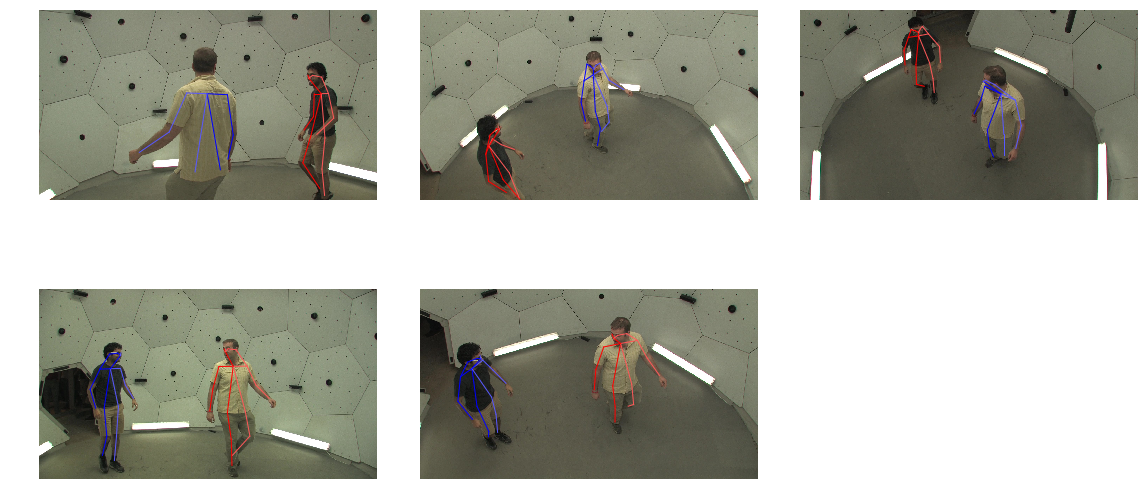

In [19]:
FRAME = 359
predictions = poses_per_frame_lookup[FRAME]
Im, Y, calib = cmu_panoptic.get(root, seq_name, 
                                    panels, nodes, frame=FRAME)

colors = ['red', 'blue', 'green', 'yellow', 'teal', 'magenta']

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fig = plt.figure(figsize=(16, 8))
for idx, (im, pred) in enumerate(zip(Im, predictions)):
    ax = fig.add_subplot(2, 3, idx+1); ax.axis('off')
    ax.imshow(im)
    ax.set_xlim([0, 1920])
    ax.set_ylim([1080, 0])
    
    for pid, human in enumerate(pred):
        draw_mscoco_human2d(ax, human[:, 0:2], color=colors[pid])

    
plt.tight_layout()
plt.show()

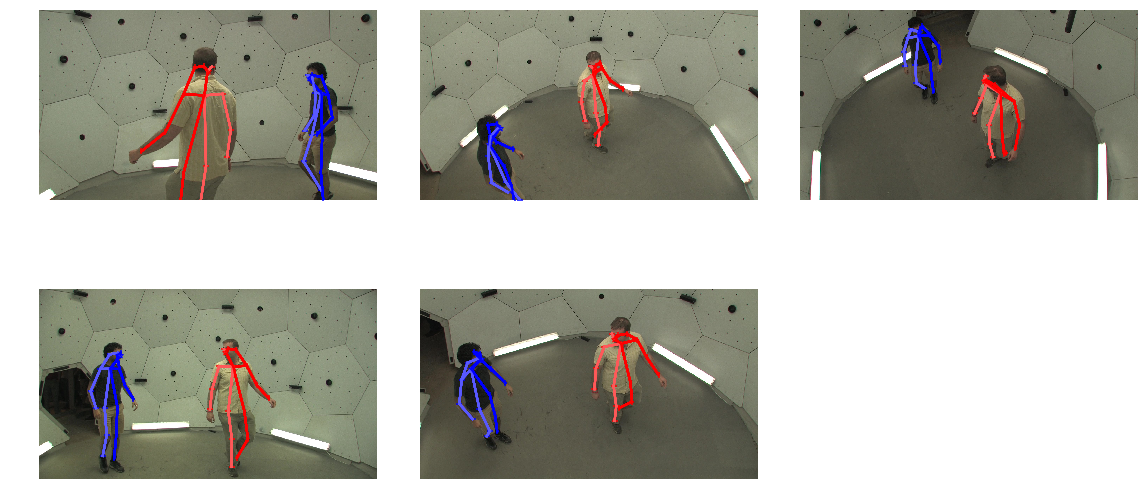

In [22]:
Humans = []
for track in tracks:
    pose = track.get_by_frame(FRAME)
    if pose is not None:
        Humans.append(pose)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fig = plt.figure(figsize=(16, 8))
for idx, (im, cam) in enumerate(zip(Im, Calib)):
    ax = fig.add_subplot(2, 3, idx+1); ax.axis('off')
    ax.imshow(im)
    ax.set_xlim([0, 1920])
    ax.set_ylim([1080, 0])
    
    for pid, human in enumerate(Humans):
        draw_mscoco_human(ax, human, cam, 
                          color=colors[pid], linewidth=2)

    
plt.tight_layout()
plt.show()

In [24]:
# from mvpose.plot.limbs import draw_mscoco_human3d
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(111, projection='3d')

# human = Humans[0]
# vmin = np.min(human)
# vmax = np.max(human)

# ax.set_xlim([vmin, vmax])
# ax.set_ylim([vmin, vmax])
# ax.set_zlim([vmin, vmax])
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# draw_mscoco_human3d(ax, human, 'red')

# plt.show()

## MOTA

https://github.com/cheind/py-motmetrics

In [25]:
# import motmetrics as mm

# acc = mm.MOTAccumulator(auto_id=True)

# for frame in valid_frames

In [ ]:
assert False

# Below: old code

In [ ]:
def calculate_pcp_score(Y, detections):
    alpha = 0.5
    Humans = kth.transform3d_from_mscoco(detections)
    L_Arms = []
    U_Arms = []
    L_Legs = []
    U_Legs = []
    GTIDs = []
    
    Y_kth = []
    for _, gt in Y:
        Y_kth.append(gt[:, 0:3])
    Y_kth = kth.transform3d_from_mscoco(Y_kth)
        
    for gtid, gt in enumerate(Y_kth):
        if gt is None:
            continue
        
        larms = 0
        uarms = 0
        llegs = 0
        ulegs = 0
        avg = 0
        for d in Humans:
            r = pcp.evaluate(gt, d, alpha)
            larms_ = r.lower_arms
            uarms_ = r.upper_arms
            ulegs_ = r.upper_legs
            llegs_ = r.lower_legs
            avg_ = (larms_ + uarms_ + ulegs_ + llegs_) / 4
            if avg_ > avg:
                avg = avg_
                larms = larms_
                uarms = uarms_
                llegs = llegs_
                ulegs = ulegs_
        
        L_Arms.append(larms)
        U_Arms.append(uarms)
        L_Legs.append(llegs)
        U_Legs.append(ulegs)
        GTIDs.append(gtid)
    
    return L_Arms, U_Arms, L_Legs, U_Legs, GTIDs
        
def print_pcp(L_Arms, U_Arms, L_Legs, U_Legs, GTIDs):
    print("")
    for la, ua, ll, ul, gid in zip(L_Arms, U_Arms, L_Legs, U_Legs, GTIDs):
        print('gtid:', gid)
        print('\tla:', la)
        print('\tua:', ua)
        print('\tll:', ll)
        print('\tul:', ul)
    
    print('avg')
    print('\tla:', np.mean(L_Arms))
    print('\tua:', np.mean(U_Arms))
    print('\tll:', np.mean(L_Legs))
    print('\tul:', np.mean(U_Legs))
    print("\n\tavg*:", np.mean([
        np.mean(L_Arms), np.mean(U_Arms), 
        np.mean(L_Legs), np.mean(U_Legs)
    ]))

In [ ]:
import numpy.linalg as la
from scipy.optimize import linear_sum_assignment

def calculate_closeness(y, y_pred):
    scale_to_mm = 10
    assert len(y) == 18
    assert len(y_pred) == 18
    y = y[:, 0:3]
    n = 0
    distances = []
    for jid, (a, b) in enumerate(zip(y, y_pred)):
        if b is None:
            continue
        d = la.norm(a-b) * scale_to_mm
        distances.append(d)
    return np.squeeze(np.mean(distances))


def find_closest_detections_to_gt(Y, humans):
    n = len(Y)
    m = len(humans)
    C = np.zeros((n, m))
    
    print('#gt:', n)
    print('#d:', m)
    
    for i in range(n):
        for j in range(m):
            C[i, j] = calculate_closeness(Y[i][1], humans[j])
    
    scores = []
    rows, cols = linear_sum_assignment(C)
    for gt_id, pr_id in zip(rows, cols):
        scores.append(C[gt_id, pr_id])
    return scores

In [ ]:
FRAME = 112
seq_name = '160906_pizza1'

In [ ]:
from mvpose import settings
import paf_loader
from mvpose import pose
from mvpose.plot.limbs import draw_mscoco_human

Im, Y, Calib = cmu_panoptic.get(root, seq_name, 
                                panels, nodes, frame=FRAME)
Y = cmu_panoptic.transform_y(Y)

# -- remove cameras --
# Im = Im[0:3]
# Y = Y[0:3]
# Calib = Calib[0:3]
# -- {end} remove cameras --

params = settings.get_settings(
    max_epi_distance=40, 
    scale_to_mm=10, 
    gp_max_radius=40,
    pp_conflict_overlap=0.7)

# -- we always use gpu --
assert loader.with_gpu
heatmaps, pafs = loader.load_confidence_map_and_paf('cmu' + seq_name, 
                                                        Im, FRAME,
                                                        dir=tmp)

_start = time()
Debug, detections = pose.estimate(
    Calib, heatmaps, pafs, settings=params, debug=True)
_end = time()
print('\ntotal elapsed:', _end - _start)

Humans = detections
print("#Humans", len(Humans))

fig = plt.figure(figsize=(12,16))

colors = ['red', 'blue', 'yellow', 'cyan', 'orange', 
          'teal', 'white', 'cornflowerblue', 'limegreen']

for idx, cam in enumerate(Calib):
    ax = fig.add_subplot(3,2,1+idx)
    ax.axis('off')
    im = Im[idx]
    h,w,_ = im.shape
    ax.imshow(im, alpha=0.6)
    ax.set_xlim([0, 1920])
    ax.set_ylim([1080, 0])
    
    for pid, human in enumerate(Humans):
        draw_mscoco_human(ax, human, cam, color=colors[pid], linewidth=2)
    
# ===
closest = find_closest_detections_to_gt(Y, Humans)
print('')
print('-- best fit --')
print(closest)
print('\tmin: ' + str(np.min(closest))) 
print('\tmax: ' + str(np.max(closest)))
print('\tavg: ' + str(np.mean(closest)))

print('')

print_pcp(*calculate_pcp_score(Y, Humans))

print('\n(GRAPH PARTITIONING)')

plt.tight_layout()
plt.show()

In [ ]:
from mvpose.baseline.baseline import estimate

_start = time()
Im, Y, Calib = cmu_panoptic.get(root, seq_name, 
                                panels, nodes, frame=FRAME)
Y = cmu_panoptic.transform_y(Y)
predictions = pe.predict(Im, 'cvpr_cmu' + seq_name, FRAME)

# -- remove cameras --
# Im = Im[0:3]
# Y = Y[0:3]
# predictions = predictions[0:3]
# Calib = Calib[0:3]
# -- {end} remove cameras --


humans, H = estimate(Calib, predictions, epi_threshold=40, 
                     get_hypothesis=True)
_end = time()
print('elapsed', _end - _start)

fig = plt.figure(figsize=(12,16))

print('#d', len(humans))
colors = ['red', 'blue', 'green', 'teal', 'orange', 'white', 'purple']

for cid, cam in enumerate(Calib):
    ax = fig.add_subplot(3, 2, 1+cid)
    ax.axis('off')
    im = Im[cid]
    h,w,_ = im.shape
    ax.set_xlim([0, w])
    ax.set_ylim([h, 0])
    ax.imshow(im, alpha=0.6)
    
    for pid, hyp in enumerate(humans):
        draw_mscoco_human(ax, hyp, cam, alpha=0.5,
                          color=colors[pid], linewidth=3)

# ===
closest = find_closest_detections_to_gt(Y, humans)
print('')
print('-- best fit --')
print(closest)
print('\tmin: ' + str(np.min(closest))) 
print('\tmax: ' + str(np.max(closest)))
print('\tavg: ' + str(np.mean(closest)))

print('')
print_pcp(*calculate_pcp_score(Y, humans))

print('\n(BASELINE)')
    
plt.tight_layout()
plt.show()

In [ ]:
#valid_frames = list(range(8630, 9230, 4))
valid_frames = list(range(8630, 8642, 4))
print('#frames', len(valid_frames))

def handle_frame(frame):
    Im, Y, Calib = cmu_panoptic.get(root, seq_name, 
                                panels, nodes, frame=frame)
    Y = cmu_panoptic.transform_y(Y)
    predictions = pe.predict(Im, 'cvpr_cmu' + seq_name, frame)
    humans, H = estimate(Calib, predictions, epi_threshold=40, 
                     get_hypothesis=True)
    
    return find_closest_detections_to_gt(Y, humans)
    
TOTAL = []
TOTAL_AVG = []
    
frame = 9100
_start = time()
scores = handle_frame(frame)
TOTAL.append(scores)
_end = time()
print('frame ' + str(frame) + ', elapsed', _end - _start)
    
# for frame in valid_frames:
#     _start = time()
#     scores = handle_frame(frame)
#     TOTAL.append(scores)
#     _end = time()
#     print('frame ' + str(frame) + ', elapsed', _end - _start)
    
print(TOTAL)

In [ ]:
from mvpose.plot.limbs import draw_mscoco_human3d

Im, Y, Calib = cmu_panoptic.get(root, seq_name, 
                                panels, nodes, frame=FRAME)
Y = cmu_panoptic.transform_y(Y)

from mpl_toolkits.mplot3d import Axes3D
item = Y[0][1][:, 0:3]
itemT = np.transpose(item)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# ---
ax.set_xlim([-80, 80])
ax.set_ylim([-140, 20])
ax.set_zlim([-140, 20])
#ax.scatter(item[:, 0], item[:, 1], item[:, 2])
draw_mscoco_human3d(ax, item, color='blue', alpha=0.3)

for idx, (x, y, z) in enumerate(item):
    ax.text( x, y, z, str(idx))

    
# ---
Hum = humans[0]
Hum
for jid, pt in enumerate(Hum):
    if pt is None:
        continue
    ax.scatter(*pt, color='red')
    ax.text(*pt, str(jid))
    
plt.show()

In [ ]:
from mvpose.data.serialize import DetectionSerializer

params = settings.get_settings(
    max_epi_distance=40, 
    scale_to_mm=10, 
    gp_max_radius=40,
    pp_conflict_overlap=0.7)

experiment = 'exp4'

In [ ]:
def handle(valid_frames, seq_name, PER_GTID_baseline, PER_GTID_model):
    global loader, params
    print('\n\n==============================')
    print('sequence:', seq_name)
    print('\t#frames:', len(valid_frames))
    print('==============================')
    
    model_serialize = DetectionSerializer(['model',
                                           seq_name,
                                           experiment])
    basel_serialize = DetectionSerializer(['basel',
                                           seq_name,
                                           experiment])
    
    for frame in valid_frames:
        _start = time()
        Im, Y, Calib = cmu_panoptic.get(root, seq_name, 
                                panels, nodes, frame=frame)
        Y = cmu_panoptic.transform_y(Y)
        
        # -- remove cameras --
        Im = Im[0:4]
        Y = Y[0:4]
        Calib = Calib[0:4]
        # -- {end} remove cameras --
        
        #----------------------
        # -- simple baseline --
        predictions = pe.predict(Im, 'cvpr_cmu' + seq_name, frame)
        
        # -- remove cameras --
        predictions = predictions[0:4]
        # -- {end} remove cameras --
        
        
        humans = estimate(Calib, predictions, epi_threshold=40)
        
        # ~~ storage ~~
        basel_serialize.store(humans, frame)
        # ~~ storage ~~
        
        for larms, uarms, llegs, ulegs, gtid in zip(*calculate_pcp_score(Y, humans)):
            if not gtid in PER_GTID_baseline:
                PER_GTID_baseline[gtid] = {
                    'larms': [],
                    'uarms': [],
                    'llegs': [],
                    'ulegs': [],
                    'frame': []
                }
            PER_GTID_baseline[gtid]['larms'].append(larms)
            PER_GTID_baseline[gtid]['uarms'].append(uarms)
            PER_GTID_baseline[gtid]['llegs'].append(llegs)
            PER_GTID_baseline[gtid]['ulegs'].append(ulegs)
            PER_GTID_baseline[gtid]['frame'].append(frame)
        
        #----------------------
        # ----- our model -----
        heatmaps, pafs = loader.load_confidence_map_and_paf(
            'cvpr2_cmu' + seq_name, Im, frame, dir=tmp)
        detections = pose.estimate(
            Calib, heatmaps, pafs, settings=params, debug=False)
        
        
        # ~~ storage ~~
        model_serialize.store(detections, frame)
        # ~~ storage ~~
        
        for larms, uarms, llegs, ulegs, gtid in zip(*calculate_pcp_score(Y, detections)):
            if not gtid in PER_GTID_model:
                PER_GTID_model[gtid] = {
                    'larms': [],
                    'uarms': [],
                    'llegs': [],
                    'ulegs': [],
                    'frame': []
                }
            PER_GTID_model[gtid]['larms'].append(larms)
            PER_GTID_model[gtid]['uarms'].append(uarms)
            PER_GTID_model[gtid]['llegs'].append(llegs)
            PER_GTID_model[gtid]['ulegs'].append(ulegs)
            PER_GTID_model[gtid]['frame'].append(frame)
        
        _end = time()
        print("\t[" + seq_name + '] frame: %05d' % frame + ', |d|:', round(_end - _start, 3))
        
    model_serialize.save()
    basel_serialize.save()
    
STEPS = 4

# ============

valid_frames = list(range(8630, 9230, STEPS))
seq_name = '160422_ultimatum1'

ULT_PER_GTID_baseline = {}
ULT_PER_GTID_model = {}

handle(valid_frames, seq_name, 
       ULT_PER_GTID_baseline, ULT_PER_GTID_model)

# ============

valid_frames = list(range(3250, 3850, STEPS))
seq_name = '160224_haggling1'

HAG_PER_GTID_baseline = {}
HAG_PER_GTID_model = {}

handle(valid_frames, seq_name, 
       HAG_PER_GTID_baseline, HAG_PER_GTID_model)

# ============

valid_frames = list(range(112, 712, STEPS))
seq_name = '160906_pizza1'

PIZ_PER_GTID_baseline = {}
PIZ_PER_GTID_model = {}

handle(valid_frames, seq_name, 
       PIZ_PER_GTID_baseline, PIZ_PER_GTID_model)

In [ ]:
def plot_info(PER_GTID):
    total_avg = []
    for key, values in PER_GTID.items():
        print('actor ', key)
        print('\tuarms:', np.mean(values['uarms']))
        print('\tlarms:', np.mean(values['larms']))
        print('\tulegs:', np.mean(values['ulegs']))
        print('\tllegs:', np.mean(values['llegs']))
        avg = np.mean([
            np.mean(values['uarms']),
            np.mean(values['larms']),
            np.mean(values['ulegs']),
            np.mean(values['llegs'])
        ])
        total_avg.append(avg)
        print('\tavg:  ', avg)
    print('\navg*:  ', np.mean(total_avg))
    
print('\n\n==============================')
print('sequence:', '160422_ultimatum1')
print('==============================')
print('baseline:')
print('--------')
plot_info(ULT_PER_GTID_baseline)
print('\nmodel:')
print('--------')
plot_info(ULT_PER_GTID_model)

print('\n\n==============================')
print('sequence:', '160224_haggling1')
print('==============================')
print('baseline:')
print('--------')
plot_info(HAG_PER_GTID_baseline)
print('\nmodel:')
print('--------')
plot_info(HAG_PER_GTID_model)

print('\n\n==============================')
print('sequence:', '160906_pizza1')
print('==============================')
print('baseline:')
print('--------')
plot_info(PIZ_PER_GTID_baseline)
print('\nmodel:')
print('--------')
plot_info(PIZ_PER_GTID_model)

In [ ]:
# model_serialize = DetectionSerializer(['model',
#                                            '160422_ultimatum1',
#                                            experiment])

# detections, frame = model_serialize.data[1]

# Im, Y, Calib = cmu_panoptic.get(root, '160422_ultimatum1', 
#                                 panels, nodes, frame=frame)
# Y = cmu_panoptic.transform_y(Y)

# fig = plt.figure(figsize=(12,16))

# colors = ['red', 'blue', 'yellow', 'cyan', 'orange', 
#           'teal', 'white', 'cornflowerblue', 'limegreen']

# for idx, cam in enumerate(Calib):
#     ax = fig.add_subplot(3,2,1+idx)
#     ax.axis('off')
#     im = Im[idx]
#     h,w,_ = im.shape
#     ax.imshow(im, alpha=0.6)
#     ax.set_xlim([0, 1920])
#     ax.set_ylim([1080, 0])
    
#     for pid, human in enumerate(detections):
#         draw_mscoco_human(ax, human, cam, color=colors[pid], 
#                           linewidth=2)
    

# print_pcp(*calculate_pcp_score(Y, detections))

# print('\n(GRAPH PARTITIONING)')

# plt.tight_layout()
# plt.show()

In [ ]:
import pickle

actual_dicts = [ULT_PER_GTID_baseline, ULT_PER_GTID_model, 
           HAG_PER_GTID_baseline, HAG_PER_GTID_model,
           PIZ_PER_GTID_baseline, PIZ_PER_GTID_model]
dict_names = ['ULT_PER_GTID_baseline', 'ULT_PER_GTID_model', 
           'HAG_PER_GTID_baseline', 'HAG_PER_GTID_model',
           'PIZ_PER_GTID_baseline', 'PIZ_PER_GTID_model']


experiment_name = 'cmu_3cam_epi40'
for dic, name in zip(actual_dicts, dict_names):
    with open(experiment_name + '_' + name + '.pkl', 'wb') as f:
        pickle.dump(dic, f, protocol=pickle.HIGHEST_PROTOCOL)

# --
def load_dict(experiment_name, dict_name):
    with open(experiment_name + '_' + dict_name + '.pkl', 'rb') as f:
        result = pickle.load(f)
    return result


#HAG_PER_GTID_model_ = load_dict(experiment_name, 'HAG_PER_GTID_model')

In [ ]:
def get_avg_by_frame(PER_GTID, actor):
    FR_act = [frame for frame in PER_GTID[actor]['frame']]
    LA_act = np.array([frame for frame in PER_GTID[actor]['larms']])
    UA_act = np.array([frame for frame in PER_GTID[actor]['uarms']])
    LL_act = np.array([frame for frame in PER_GTID[actor]['llegs']])
    UL_act = np.array([frame for frame in PER_GTID[actor]['ulegs']])
    AV_act = (LA_act + UA_act + LL_act + LL_act) / 4
    return FR_act, AV_act

FR_act1, AV_act1 = get_avg_by_frame(ULT_PER_GTID_model, 5)
FR_act2, AV_act2 = get_avg_by_frame(ULT_PER_GTID_baseline, 5)

print('model\t\t', np.mean(AV_act1))
print('baseline\t', np.mean(AV_act2))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(FR_act1, AV_act1, alpha=0.7, label='model')
ax.plot(FR_act2, AV_act2, alpha=0.7, label='baseline')
plt.legend()
plt.show()

# REMEMBER RESULTS

## 300 frames per video, epi=40, fixed

In [ ]:
# CAMERAS
# ==============================
# sequence: 160422_ultimatum1
# ==============================
# baseline:
# --------
# actor  0
# 	uarms: 0.865
# 	larms: 0.6816666666666666
# 	ulegs: 0.10833333333333334
# 	llegs: 0.051666666666666666
# 	avg:   0.4266666666666667
# actor  1
# 	uarms: 0.1
# 	larms: 0.09166666666666666
# 	ulegs: 0.09333333333333334
# 	llegs: 0.08333333333333333
# 	avg:   0.09208333333333332
# actor  2
# 	uarms: 0.5886524822695035
# 	larms: 0.5620567375886525
# 	ulegs: 0.8617021276595744
# 	llegs: 0.6932624113475178
# 	avg:   0.676418439716312

# avg*:   0.3983894799054373

# model:
# --------
# actor  0
# 	uarms: 0.8416666666666667
# 	larms: 0.7833333333333333
# 	ulegs: 0.31333333333333335
# 	llegs: 0.25666666666666665
# 	avg:   0.5487500000000001
# actor  1
# 	uarms: 0.14833333333333334
# 	larms: 0.13
# 	ulegs: 0.15166666666666667
# 	llegs: 0.12333333333333334
# 	avg:   0.13833333333333334
# actor  2
# 	uarms: 0.9148936170212766
# 	larms: 0.8421985815602837
# 	ulegs: 0.9148936170212766
# 	llegs: 0.7145390070921985
# 	avg:   0.8466312056737588

# avg*:   0.5112381796690307


# ==============================
# sequence: 160224_haggling1
# ==============================
# baseline:
# --------
# actor  0
# 	uarms: 0.6433333333333333
# 	larms: 0.44
# 	ulegs: 0.9583333333333334
# 	llegs: 0.41333333333333333
# 	avg:   0.61375
# actor  1
# 	uarms: 0.74
# 	larms: 0.6766666666666666
# 	ulegs: 0.86
# 	llegs: 0.39166666666666666
# 	avg:   0.6670833333333333
# actor  2
# 	uarms: 0.4266666666666667
# 	larms: 0.35333333333333333
# 	ulegs: 0.7183333333333334
# 	llegs: 0.6533333333333333
# 	avg:   0.5379166666666667

# avg*:   0.6062500000000001

# model:
# --------
# actor  0
# 	uarms: 0.9816666666666667
# 	larms: 0.8766666666666667
# 	ulegs: 0.9633333333333334
# 	llegs: 0.7366666666666667
# 	avg:   0.8895833333333334
# actor  1
# 	uarms: 0.9666666666666667
# 	larms: 0.94
# 	ulegs: 0.9616666666666667
# 	llegs: 0.9133333333333333
# 	avg:   0.9454166666666666
# actor  2
# 	uarms: 0.6616666666666666
# 	larms: 0.605
# 	ulegs: 0.6316666666666667
# 	llegs: 0.6116666666666667
# 	avg:   0.6275000000000001

# avg*:   0.8208333333333333


# ==============================
# sequence: 160906_pizza1
# ==============================
# baseline:
# --------
# actor  0
# 	uarms: 0.7066666666666667
# 	larms: 0.6733333333333333
# 	ulegs: 0.37
# 	llegs: 0.32666666666666666
# 	avg:   0.5191666666666667
# actor  1
# 	uarms: 0.4666666666666667
# 	larms: 0.41833333333333333
# 	ulegs: 0.43
# 	llegs: 0.36833333333333335
# 	avg:   0.42083333333333334
# actor  2
# 	uarms: 0.535
# 	larms: 0.4066666666666667
# 	ulegs: 0.37833333333333335
# 	llegs: 0.22666666666666666
# 	avg:   0.38666666666666666

# avg*:   0.44222222222222224

# model:
# --------
# actor  0
# 	uarms: 0.9816666666666667
# 	larms: 0.965
# 	ulegs: 0.975
# 	llegs: 0.6583333333333333
# 	avg:   0.895
# actor  1
# 	uarms: 0.8966666666666666
# 	larms: 0.78
# 	ulegs: 0.6383333333333333
# 	llegs: 0.45666666666666667
# 	avg:   0.6929166666666666
# actor  2
# 	uarms: 0.955
# 	larms: 0.8566666666666667
# 	ulegs: 0.7566666666666667
# 	llegs: 0.5166666666666667
# 	avg:   0.77125

# avg*:   0.7863888888888889


## All images, epi=40